In [1]:
import warnings
warnings.filterwarnings('ignore')
# For ignoring warnings printed by R magic commands

In [2]:
# Load R magic
%load_ext rpy2.ipython

In [28]:
%%R
library(ggplot2)
library(ggthemes)
library(RColorBrewer)

blues = brewer.pal(n = 6, "Blues")[4:6]
plotTheme <- theme_hc() + theme(legend.title=element_blank(), 
                                legend.position="right", 
                                legend.text=element_text(size=8))

In [3]:
import pandas as pd

In [18]:
df_single = pd.read_csv('data/single-core-completions/5-level-single.csv', sep=',', header=None, names=['Duration'])
df_single['Scheme'] = 'Single Core'
df_mem = pd.read_csv('data/6-22-19/completion_times/5-level-mem.csv', sep=',', header=None, names=['Duration'])
df_mem['Scheme'] = 'Memory'
df_ddio = pd.read_csv('data/6-22-19/completion_times/5-level-ddio.csv', sep=',', header=None, names=['Duration'])
df_ddio['Scheme'] = 'DDIO'
df_reg = pd.read_csv('data/6-22-19/completion_times/5-level-reg.csv', sep=',', header=None, names=['Duration'])
df_reg['Scheme'] = 'Register'
df_reg_offload = pd.read_csv('data/6-22-19/completion_times/5-level-reg-offload.csv', sep=',', header=None, names=['Duration'])
df_reg_offload['Scheme'] = 'Register with NIC Offload'

df = pd.concat([df_single, df_mem, df_ddio, df_reg, df_reg_offload])
# df = df_single

In [19]:
df.describe()

,Duration
count,4.117000e+03
mean,9.036778e+04
std,1.066624e+05
min,1.070000e+02
25%,2.639300e+04
50%,4.244700e+04
75%,1.226650e+05
max,1.230640e+06


In [20]:
df.head()

,Duration,Scheme
0,63046.0,Single Core
1,181943.0,Single Core
2,118437.0,Single Core
3,154534.0,Single Core
4,242810.0,Single Core


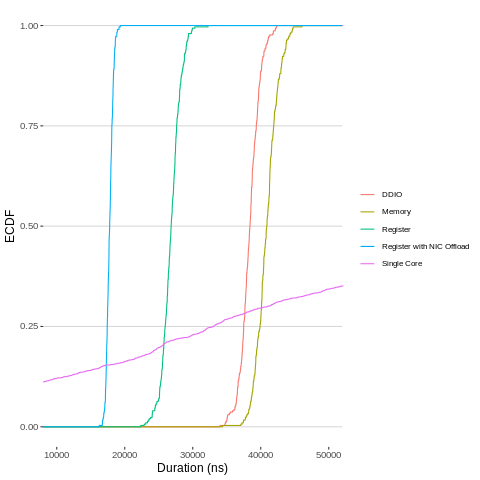

In [29]:
%%R -i df
ggplot(df, aes(x=Duration, colour=Scheme)) + 
    stat_ecdf(geom = "step") +
    coord_cartesian(xlim = c(10000, 50000)) +
    labs(y = "ECDF", x="Duration (ns)") +
    plotTheme

In [19]:
# df.to_csv('temp/combined.csv', index=False)